In [1]:
import tensorflow as tf
from icnr import ICNR
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def renorm(a):
    std = 1.0/(a.max() - a.min())
    return (a - a.min())*std

def prepare(w):
    t = tf.transpose(w, perm = [2, 0, 1, 3] )
    t = t[0,:,:,:3]
    return t

In [3]:
initializer = tf.keras.initializers.GlorotNormal
w = initializer()(shape=[10,10,32,64], dtype=tf.float32)
w_icnr = ICNR(initializer(), scale=2)(shape=[10,10,32,64], dtype=tf.float32)

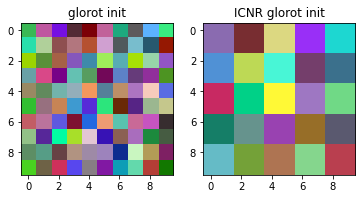

In [4]:
w1 = renorm(prepare(w).numpy())
w2 = renorm(prepare(w_icnr).numpy())
plt.subplot(1,2,1)
plt.imshow(w1, interpolation='nearest')
plt.title("glorot init")
plt.subplot(1,2,2)
plt.imshow(w2, interpolation='nearest')
plt.title("ICNR glorot init");